<center><img src="https://github.com/girishksahu/INSAID2021/blob/SMART_AI_Learning/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

<h1><center>Machine Learning Intermediate Project - Avocado Price Prediction for AvoCare</center><h1>

<center><img width=40% src="https://github.com/girishksahu/INSAID2021-ML-Intermediate-Avocado_Price_Prediction/blob/SMART_AI_Learning/avocado-logo.png?raw=true"></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
  - **3.1** [**Version Check**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)<br>
  - **5.2** [**Data Pre-Processing**](#Section52)<br>
  - **5.3** [**Data Post-profiling**](#Section53)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Feature Selection**](#Section71)<br> 
  - **7.2** [**Data Preparation**](#Section72)<br>
  - **7.3** [**Data Scaling**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- Your client for this project is a major Avocado Producer.

    - Their avocados are sourced from over **1000 growers** owning over **65,000 acres** across California, Mexico, Chile, and Peru.
    - With generations of experience growing, packing, and shipping avocados, they have a deep understanding of the avocado industry.
    - Their aim is to source quality fruit that’s sustainably grown and handled in the most efficient, shortest supply route possible.
    - They want to increase their supply throughout the United States and need to make sure that they are selling their products at the best possible price.


**<h3>Current Scenario:</h3>**

- Avocado prices have rocketed in recent years by up to **129%**, with the average national price in the US of a single Hass avocado reaching **$2.10** in 2019, almost doubling in just one year.
    - Due to this uncertainty in the prices, the company is not able to sell their produce at the optimal price.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- **The current process suffers from the following problems:**
  - The price of avocado is dependent on global demands and seasonal production.
  - Due to these reasons, it is quite difficult to know for certain the price in the future.

- The company has hired you as data science consultants. 
    - They want to automate the process of predicting the future price of avocado, based on the historical data.

<a name = Section21></a>
### **Your Role**

- You are given a dataset containing the weekly retail scan data of avocadoes.
- Your task is to build a regression model using the dataset.
- Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

<a name = Section21></a>
### **Project Deliverables**
- Deliverable: Predict the average price of a single avocado.
- Machine Learning Task: Regression
- Target Variable: AveragePrice
- Win Condition: N/A (best possible model)

<a name = Section21></a>
### **Evaluation Metric**

- The model evaluation will be based on the RMSE score.

<center><img src="https://github.com/girishksahu/INSAID2021-ML-Intermediate-Avocado_Price_Prediction/blob/SMART_AI_Learning/Avocado-1.jpg?raw=true"></center>

---
<a name = Section3></a>
# **3. Importing Libraries**
---

<a name = Section31></a>
### **3.1 Version Check**

In [5]:
from platform import python_version

# Printing version of Python to ensure correct version is used for this project
print("python version", python_version())
#!pip list
#!pip show


python version 3.8.5


<a name = Section32></a>
### **3.2 Importing Libraries**

In [6]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import sklearn.metrics
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

#Printing version of few key libraries to ensure correct once are used
print ("pandas version", pd.__version__)
print ("numpy version", np.__version__)
print ("seaborn version", sns.__version__)
print ("sklearn version", sklearn.__version__)

pandas version 1.1.3
numpy version 1.19.2
seaborn version 0.11.0
sklearn version 0.24.2


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The **Training dataset** contains weekly retail scan data for National Retail Volume (units) and price.Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.The column **AveragePrice** is the average price of a single avocado.This is the data that we have to predict for future samples.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 14599 | 14 | 1.6 MB | 

<br>

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|01| **Id**   | Unique identity of each observation                          |
|02| **Date** | The date of the observation                 |
|03| **AveragePrice**        | The average price of a single avocado            |
|04| **TotalVolume**          | Total number of avocados sold                     |
|05| **4046**      | Total number of avocados with PLU 4046 sold                  |
|06| **4225**           | Total number of avocados with PLU 4225 sold
|07| **4770**     | Total number of avocados with PLU 4770 sold |
|08| **TotalBags**     | Total number of bags sold|
|09| **SmallBags**        | Total number of small bags sold|
|10| **LargeBags**          | Total number of large bags sold  |
|11| **XLargeBags**         | Total number of extra-large bags sold |
|12| **type**     | Type of an avocado (conventional or organic)  |
|13| **year**     | 	The year of observation  |
|14| **Region**     | The city or region of the observation |

- The **Test dataset** consists of weekly retail scan data for National Retail Volume (units) and **AveragePrice** need to be predicted.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 3650 | 13 | 370.7 KB | 

<br>

- Load AvoCare retail scan Data to be used for Training and Validation

In [7]:
# Id is unique ID for record and can be used as label for index
avocado_master_data = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2021-ML-Intermediate-Avocado_Price_Prediction/SMART_AI_Learning/avocado_train.csv", index_col='Id')

# Get the dimesions of data
print('Shape of the Training and Validation dataset:', avocado_master_data.shape)

# Output first 5 data rows
avocado_master_data.head()


Shape of the Training and Validation dataset: (14599, 13)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Id,,,,,,,,,,,,,
14761,2017-08-20,1.86,2584.08,61.21,143.82,0.00,2379.05,2379.05,0.00,0.0,organic,2017,Albany
6843,2017-11-12,1.14,100811.00,3181.00,43510.00,86.00,54034.00,11788.00,42246.00,0.0,conventional,2017,Louisville
7306,2017-02-12,0.95,430096.94,242212.80,81697.52,264.25,105922.37,48557.37,57365.00,0.0,conventional,2017,Orlando
12329,2016-05-22,1.71,5433.16,437.48,2422.71,544.63,2028.34,2021.67,6.67,0.0,organic,2016,Charlotte
12036,2016-01-10,1.66,5614.09,2123.47,2121.26,0.00,1369.36,392.02,977.34,0.0,organic,2016,Atlanta


- Load AvoCare Test Data to be used for Average Price Prediction

In [8]:
# Id is unique ID for record and can be used as label for index
avocado_test_data = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2021-ML-Intermediate-Avocado_Price_Prediction/SMART_AI_Learning/avocado_test.csv", index_col='Id')

# Get the dimesions of data
print('Shape of the Test dataset to be used for Prediction:', avocado_test_data.shape)

# Output first 5 data rows
avocado_test_data.head()

Shape of the Test dataset to be used for Prediction: (3650, 12)


,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Id,,,,,,,,,,,,
11137,2015-05-03,12425.42,426.78,6174.20,548.21,5276.23,2313.33,2962.90,0.00,organic,2015,RichmondNorfolk
16503,2017-10-08,11837.20,2749.91,124.43,0.00,8962.86,8921.88,40.98,0.00,organic,2017,PhoenixTucson
6438,2017-07-02,4250394.01,740503.01,1423924.97,356791.68,1729174.35,1157601.31,485376.01,86197.03,conventional,2017,GreatLakes
8247,2017-05-14,74951.66,1032.62,43170.45,42.00,30706.59,28525.65,2180.94,0.00,conventional,2017,Syracuse
10481,2015-12-13,4594.71,592.64,2602.48,0.00,1399.59,696.67,702.92,0.00,organic,2015,Nashville


In [9]:
# Check for any missing values
any(avocado_master_data.isna().sum())

False

In [10]:
#check if any duplicate row
any(avocado_master_data.duplicated())

False

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [11]:
print('Describe Feature Length:', len(avocado_master_data.describe(include='all').columns))
avocado_master_data.describe(include=[np.int64]).filter(items=['count'], axis=0)

Describe Feature Length: 13


,year
count,14599.0


In [12]:
#Basic statistical details for numeric variables

avocado_master_data.describe(include=[np.float64])

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,14599.000000,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,14599.000000
mean,1.409168,8.136614e+05,2.787616e+05,2.835157e+05,2.175564e+04,2.296264e+05,1.746354e+05,5.199545e+04,2995.622236
std,0.404518,3.292013e+06,1.206792e+06,1.150215e+06,1.025608e+05,9.429775e+05,7.139212e+05,2.343441e+05,17313.445157
min,0.440000,3.855500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.080823e+04,8.493600e+02,3.018255e+03,0.000000e+00,5.040900e+03,2.828890e+03,1.314550e+02,0.000000
50%,1.370000,1.070186e+05,8.425390e+03,2.890747e+04,1.807200e+02,3.960296e+04,2.631176e+04,2.621750e+03,0.000000
75%,1.670000,4.261702e+05,1.087822e+05,1.451605e+05,6.136665e+03,1.096453e+05,8.300046e+04,2.151112e+04,127.940000
max,3.250000,6.250565e+07,2.162018e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000


**Observations:**
- Total count for all numeric variables is same (14599) which confirms that there are no missing values.
- Most of them appear to have outliers and mean value is higher than median
- Variables like **Total Volume**,**4046**, **4225**,**4770**, **Total Bags**, **Small Bags**, **Large Bags** and **XLarge Bags** appears to be highly skewed.
- **Average Price** appears to have somewhat normal distribution.

In [13]:
#Basic statistical details for categorical variables
avocado_master_data.describe(include=[np.object])

,Date,type,region
count,14599,14599,14599
unique,169,2,54
top,2017-07-09,conventional,Tampa
freq,99,7301,285


**Observations:**
- Total count for all categorical variable is 14599 which confirms that there are no missing values. 
- Majority of data are from Tampa **region** and **type** is conventional

In [14]:
# Columns list can be handy and useful for further steps
avocado_master_data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of the features**.

In [15]:
# Check column data types and any null values
avocado_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14599 entries, 14761 to 16551
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          14599 non-null  object 
 1   AveragePrice  14599 non-null  float64
 2   Total Volume  14599 non-null  float64
 3   4046          14599 non-null  float64
 4   4225          14599 non-null  float64
 5   4770          14599 non-null  float64
 6   Total Bags    14599 non-null  float64
 7   Small Bags    14599 non-null  float64
 8   Large Bags    14599 non-null  float64
 9   XLarge Bags   14599 non-null  float64
 10  type          14599 non-null  object 
 11  year          14599 non-null  int64  
 12  region        14599 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.6+ MB


**Observations:**

- Total Non-Null count for each column is same as 14599 which means there are no missing values.

- There are **3 Categorical features**, **10 Numerical features** with 1 column as integer feature as they contain numerical values.

In [16]:
# Get list of categorical variables
s = (avocado_master_data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Date', 'type', 'region']


In [17]:
# Get list of numerical variables
s = (avocado_master_data.dtypes == 'int64')
numeric_cols = list(s[s].index)

print("Numeric variables INT:")
print(numeric_cols)

Numeric variables INT:
['year']


In [18]:
# Get list of numerical variables
s = (avocado_master_data.dtypes == 'float64')
numeric_cols = list(s[s].index)

print("Numeric variables Float:")
print(numeric_cols)

Numeric variables Float:
['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']


### **Numerical Data Distribution:**

- We shall plot all **numerical features to analyze the distribution** of their past.

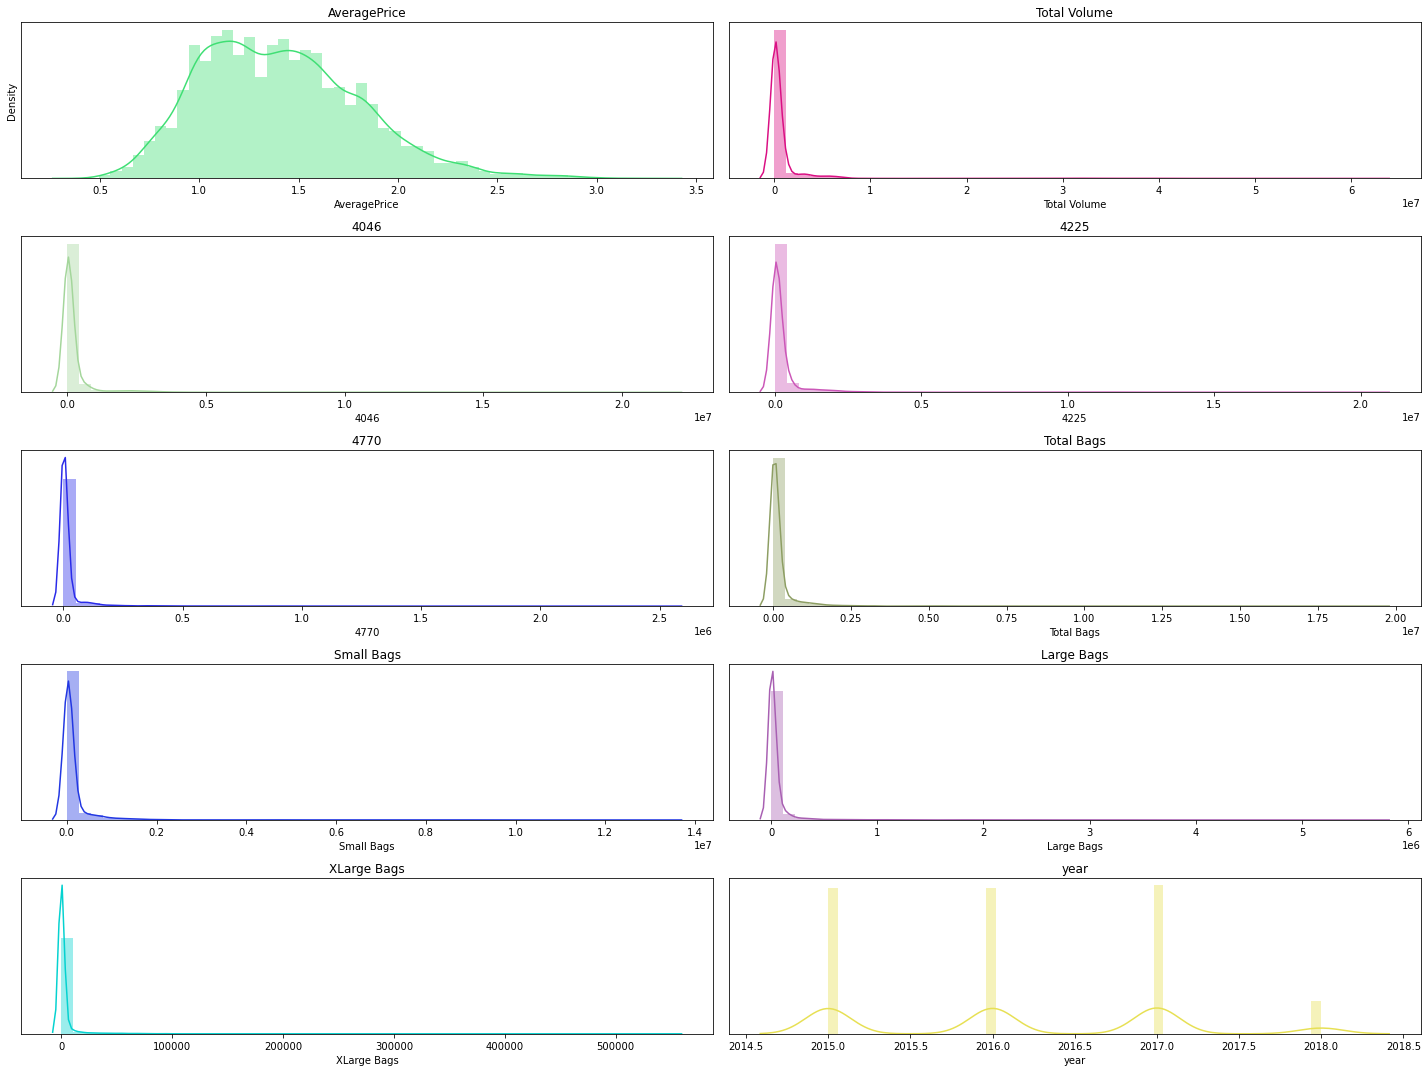

In [19]:
# For Random seed values
from random import randint
fig, axes = plt.subplots(nrows = 5, ncols = 2, sharex = False, figsize=(20, 15))
colors = []
for i in range(10):
  colors.append('#%06X' % randint(0, 0xFFFFFF))
  columns=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','year']
for ax, col, color in zip(axes.flat, columns, colors):
  sns.distplot(a = avocado_master_data[col], bins = 50, ax = ax, color = color)
  ax.set_title(col)
  plt.setp(axes, yticks=[])
  ax.grid(False)
plt.tight_layout()
plt.show()

**Observation:**

- **Postive Skewed Features: (Mean > Median)**
 - Total Volume,
 - 4046, 
 - 4225, 
 - 4770, 
 - TotalBags, 
 - SmallBags
 - LargeBags,
 - XLargeBags
- **Negative Skewed Features: (Mean < Median)**
 - NA
- **~ Normally Distributed Features: (Mean = Median = Mode)**
 - AveragePrice
 - year

### **Categorical Data Distribution:**

- We shall plot all **categorical features to analyze the distribution** of the past data.


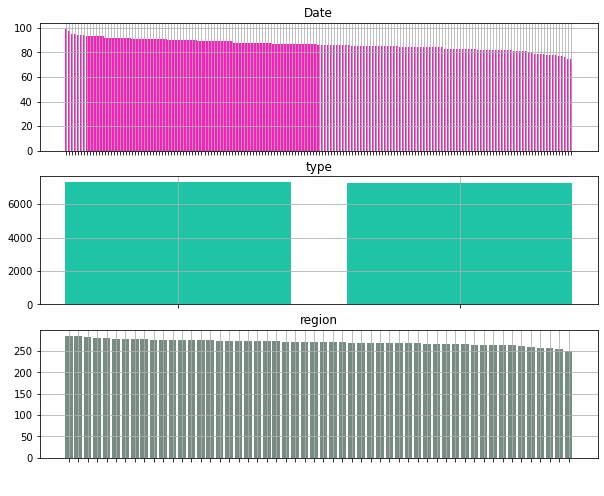

In [20]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, sharex = False, figsize=(10, 8))

colors = []
for i in range(3):
  colors.append('#%06X' % randint(0, 0xFFFFFF))
  
for ax, col, color in zip(axes.flat, object_cols, colors):
  ax.bar(x = avocado_master_data[col].value_counts().index, height = avocado_master_data[col].value_counts(), color = color)
  ax.set_title(col)
  ax.set_xlabel(' ')
  ax.set_xticklabels(labels = ' ')
  ax.grid(True)

**Observation:**

- **Normal Distributed Features: (Mean = Median = Mode)**
 - region
 - type
 - Date
- **Postively Skewed Features: (Mean > Median)**
 - NA
- **Negatively Skewed Features: (Mean < Median)**
 - NA

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [21]:
profile = ProfileReport(df=avocado_master_data)
profile.to_file(output_file='Avocado Price Prediction Pre Profiling Report.html')
print('Accomplished!')


Accomplished!


**Observations:**

- The report shows that there are a **total** of **14 features** out of which **10** are **numerical**, **4** are **categorical**, note that it is showing **Date** and **year** as categorical type.

- **4046** has around 1.3% as missing values and distribution is positively skewed.

- **4225** has around 0.3% as missing values and distribution is positively skewed.

- **4770** has around 29.9% as missing values and distribution is positively skewed.

- **TotalBags** has around 0.1% as missing values and distribution is positively skewd.

- **SmallBags** has around 0.9% as missing values and distribution is positively skewed.

- **LargeBags** has around 66.1% as missing values and distribution is positively skewed.

- **XLargeBags** has around 0.1% as missing values and has around 0.7% as Zero values.


- For detailed information, please check **Avocado Price Prediction Pre Profiling Report.html** file.

<a name = Section52></a>
### **5.2 Data Pre-Processing**

- There are no missing values but we will handle few features after EDA and before Model Evaluation

<a name = Section53></a>
### **5.3 Data Post-Profiling**

- We can run the report to get latest information

In [22]:
# post_profile=ProfileReport(df=avocado_master_data)
# post_profile.to_file(output_file='Avocado Price Post Profiling Report.html')
# print('Accomplished!')

**Observations:**

- TBD

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

**Q: What is the breakdown of region?**

In [23]:
avocado_master_data['region'].unique().shape

(54,)

In [24]:
avocado_master_data['region'].value_counts()

Tampa                  285
Boston                 284
Seattle                282
Portland               280
Northeast              280
HarrisburgScranton     277
Chicago                277
HartfordSpringfield    277
Boise                  277
Plains                 276
NewYork                276
Jacksonville           275
Albany                 275
Detroit                275
WestTexNewMexico       275
BuffaloRochester       275
MiamiFtLauderdale      274
Houston                274
California             274
Louisville             274
GrandRapids            274
Denver                 273
CincinnatiDayton       273
NewOrleansMobile       272
LasVegas               272
Columbus               271
BaltimoreWashington    271
SanDiego               270
Philadelphia           270
Roanoke                270
RichmondNorfolk        269
NorthernNewEngland     269
Charlotte              269
Spokane                269
SanFrancisco           269
RaleighGreensboro      269
Nashville              268
S

**Q: What is the breakdown of region with Average Price?**

In [25]:
regionandaverageprice=avocado_master_data[['region','AveragePrice']]
regionvsaverageprice= regionandaverageprice.groupby(by='region').median().sort_values(by='AveragePrice',ascending= False) 
regionvsaverageprice

,AveragePrice
region,
HartfordSpringfield,1.790
NewYork,1.760
SanFrancisco,1.750
Northeast,1.650
Philadelphia,1.630
Sacramento,1.620
Charlotte,1.620
Chicago,1.600
Albany,1.560


Text(0.5, 0, 'Average Price')

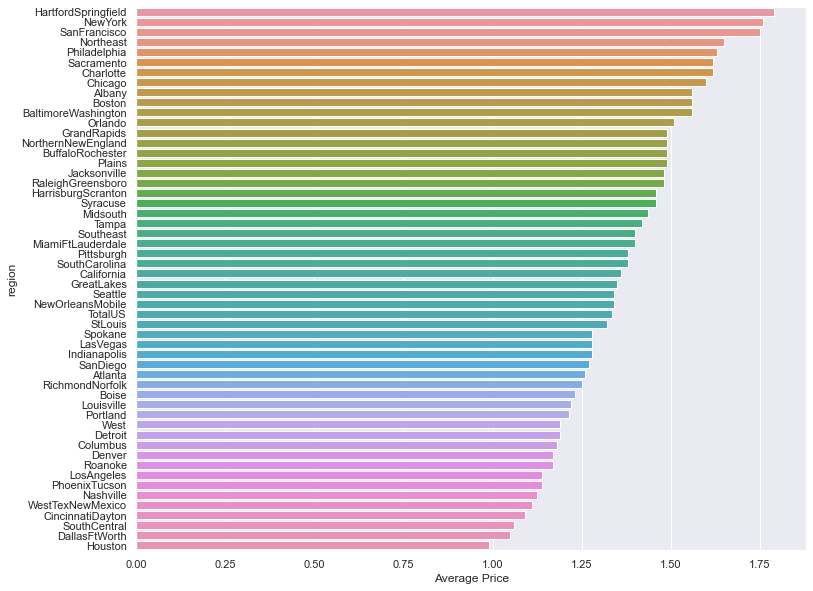

In [26]:
plt.figure(figsize=(12,10))
sns.set(font_scale = 1)
sns.barplot(y=regionvsaverageprice.index, x=regionvsaverageprice['AveragePrice'],)
plt.xlabel('Average Price')

In [27]:
avocado_master_data['type'].value_counts()

conventional    7301
organic         7298
Name: type, dtype: int64

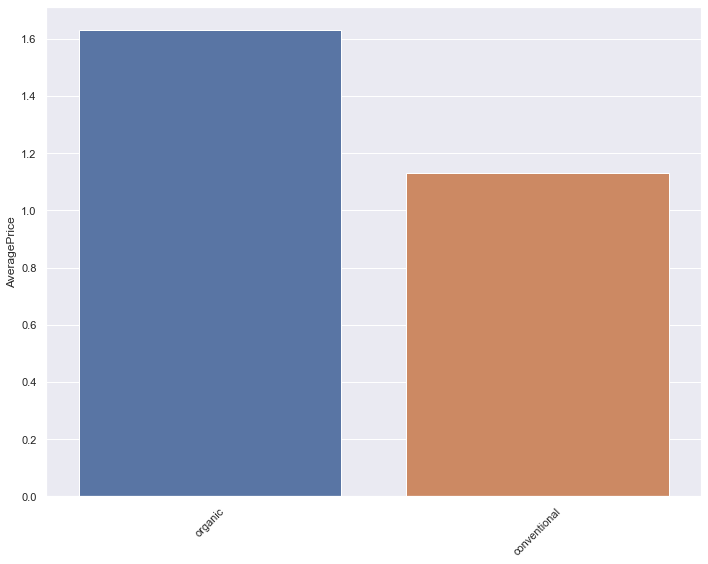

In [28]:
plt.figure(figsize=(10,8))
sns.barplot(avocado_master_data['type'].unique(),avocado_master_data.groupby('type')['AveragePrice'].median().sort_values(ascending=False))
plt.xticks(rotation=45)
plt.tight_layout()

In [29]:
yearandaverageprice=avocado_master_data[['year','AveragePrice']]
yearvsaverageprice= yearandaverageprice.groupby(by='year').median().sort_values(by='AveragePrice',ascending= False) 
yearvsaverageprice

,AveragePrice
year,
2017,1.50
2018,1.34
2016,1.31
2015,1.29


Text(0.5, 0, 'Average Price')

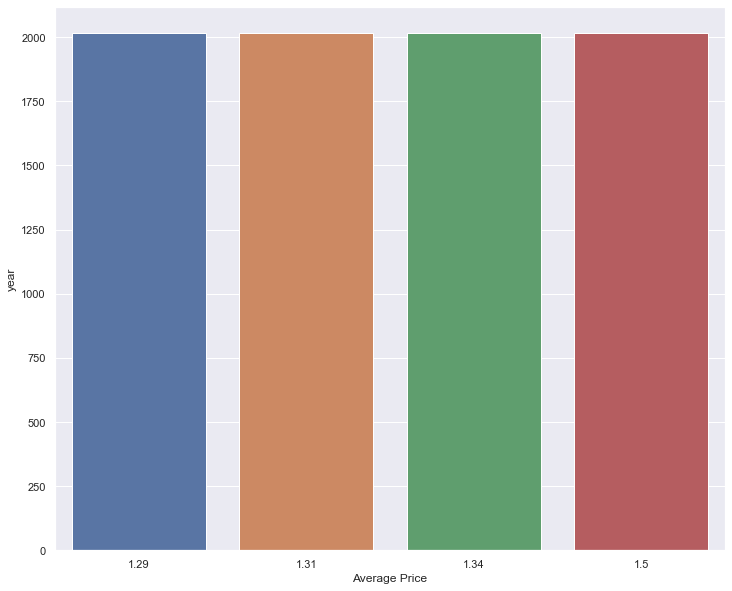

In [30]:
plt.figure(figsize=(12,10))
sns.set(font_scale = 1)
sns.barplot(y=yearvsaverageprice.index, x=yearvsaverageprice['AveragePrice'],)
plt.xlabel('Average Price')

<AxesSubplot:xlabel='Total Bags', ylabel='Total Volume'>

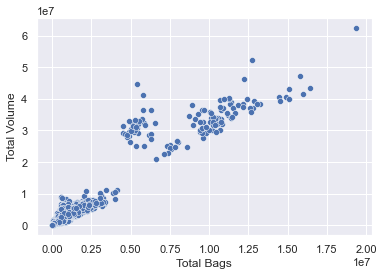

In [31]:
sns.scatterplot(x=avocado_master_data['Total Bags'],y=avocado_master_data['Total Volume'])

In [32]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(avocado_master_data['Total Volume']))
print(z)

[0.24638574 0.21654677 0.11651764 ... 0.22623375 0.18272657 0.243717  ]


In [33]:
threshold = 3
print(np.where(z > 2))

(array([   56,   142,   144,   165,   229,   412,   447,   459,   492,
         716,   876,   877,   917,  1042,  1093,  1230,  1406,  1476,
        1564,  1800,  1815,  1903,  1914,  1922,  1999,  2022,  2051,
        2128,  2225,  2226,  2805,  2811,  3017,  3101,  3207,  3334,
        3395,  3460,  3520,  3571,  3630,  3815,  3845,  3893,  3945,
        4029,  4387,  4570,  4727,  4908,  5008,  5073,  5093,  5266,
        5379,  5486,  5518,  5550,  5609,  5650,  5694,  5899,  6055,
        6120,  6246,  6381,  6415,  6630,  6848,  6876,  6894,  6967,
        7169,  7208,  7256,  7264,  7519,  7562,  7591,  7601,  7772,
        7840,  8047,  8062,  8162,  8218,  8243,  8307,  8314,  8432,
        8526,  8574,  8714,  8852,  8924,  8989,  9060,  9079,  9162,
        9182,  9195,  9277,  9300,  9333,  9363,  9490,  9697,  9778,
        9863,  9916,  9924,  9931,  9990, 10216, 10320, 10418, 10427,
       10750, 10786, 10805, 10843, 10971, 11002, 11019, 11287, 11518,
       11623, 11647

In [34]:
print(z[9450])

0.2384524590447446


In [35]:
print(avocado_master_data.iloc[[9450]])

             Date  AveragePrice  Total Volume     4046   4225  4770  \
Id                                                                    
17821  2018-03-04          1.37      28699.66  6442.57  67.11   0.0   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year   region  
Id                                                                              
17821    22189.98    21933.32      256.66          0.0  organic  2018  Houston  


Text(0.5, 1.0, 'Box and Whisker Plot')

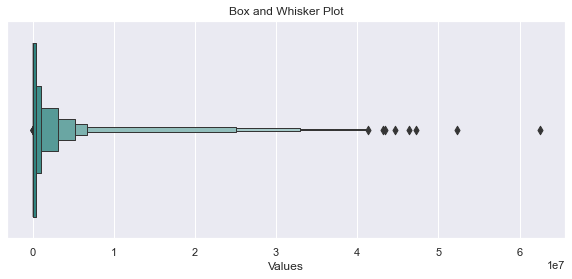

In [36]:
plt.figure(figsize=(10, 4))
sns.boxenplot(avocado_master_data['Total Volume'], palette='viridis')
plt.xlabel('Values')
plt.title('Box and Whisker Plot')

Text(0.5, 1.0, 'Box and Whisker Plot')

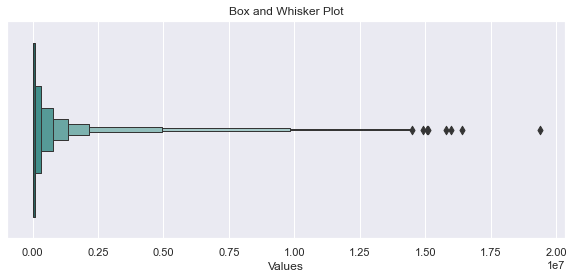

In [37]:
plt.figure(figsize=(10, 4))
sns.boxenplot(avocado_master_data['Total Bags'], palette='viridis')
plt.xlabel('Values')
plt.title('Box and Whisker Plot')

**Below are various plots for Numeric feature distribution to get different view point for better data understanding**

<Figure size 3600x1800 with 0 Axes>

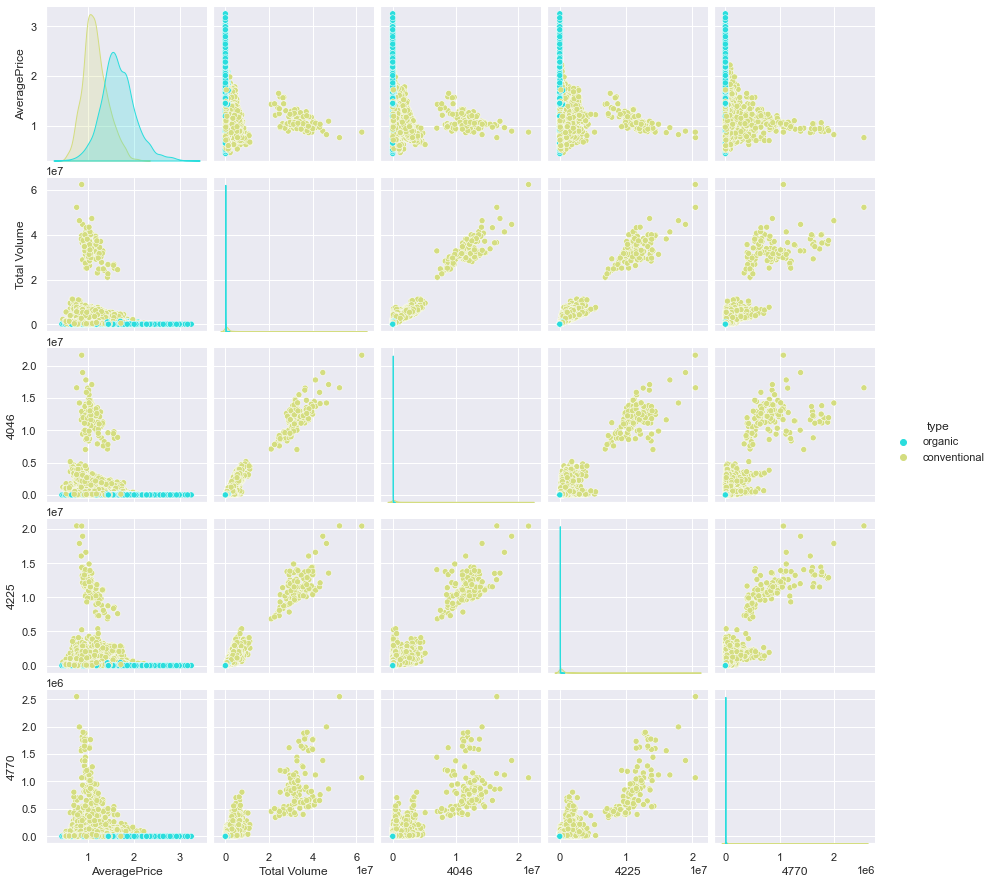

In [38]:
plt.figure(figsize=(50,25))
sns.pairplot(avocado_master_data[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'type']],palette='rainbow',diag_kind='kde',hue="type")

<Figure size 3600x1800 with 0 Axes>

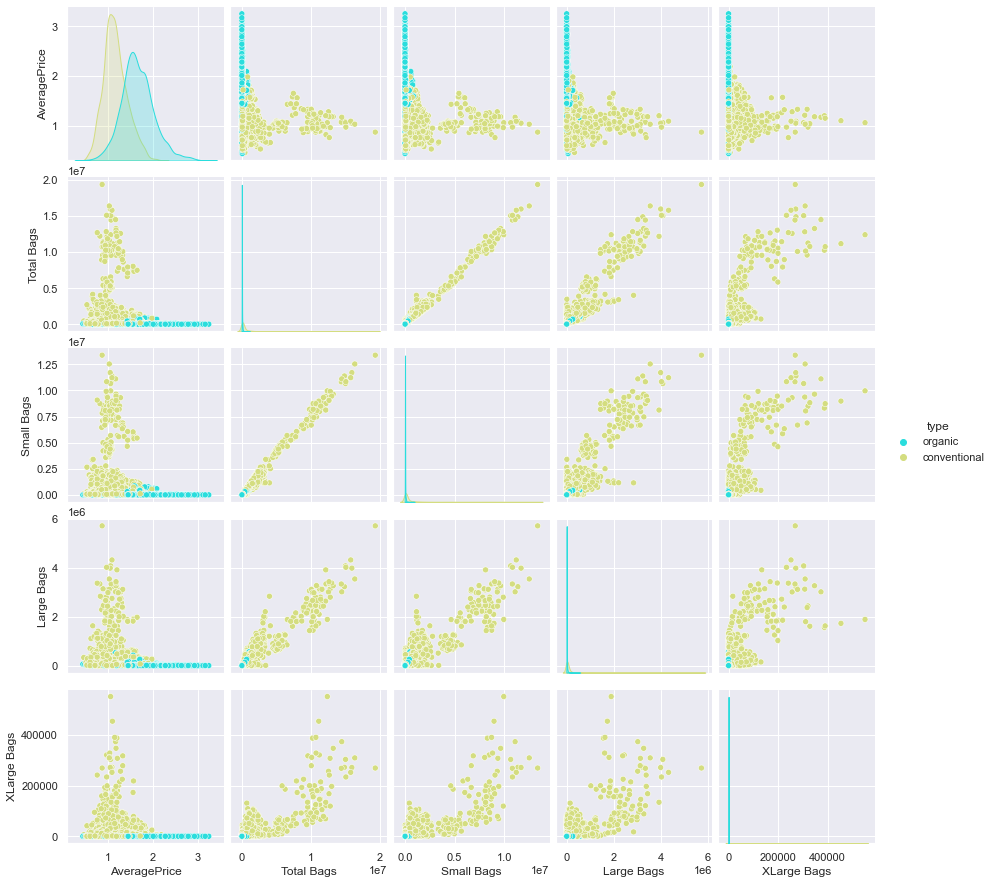

In [39]:
plt.figure(figsize=(50,25))
sns.pairplot(avocado_master_data[['AveragePrice', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],palette='rainbow',diag_kind='kde',hue="type")

**Q: What is correlation of Average Price across various Numerical features**

Text(0.5, 1.0, 'Correlation between Numerical features and target variable')

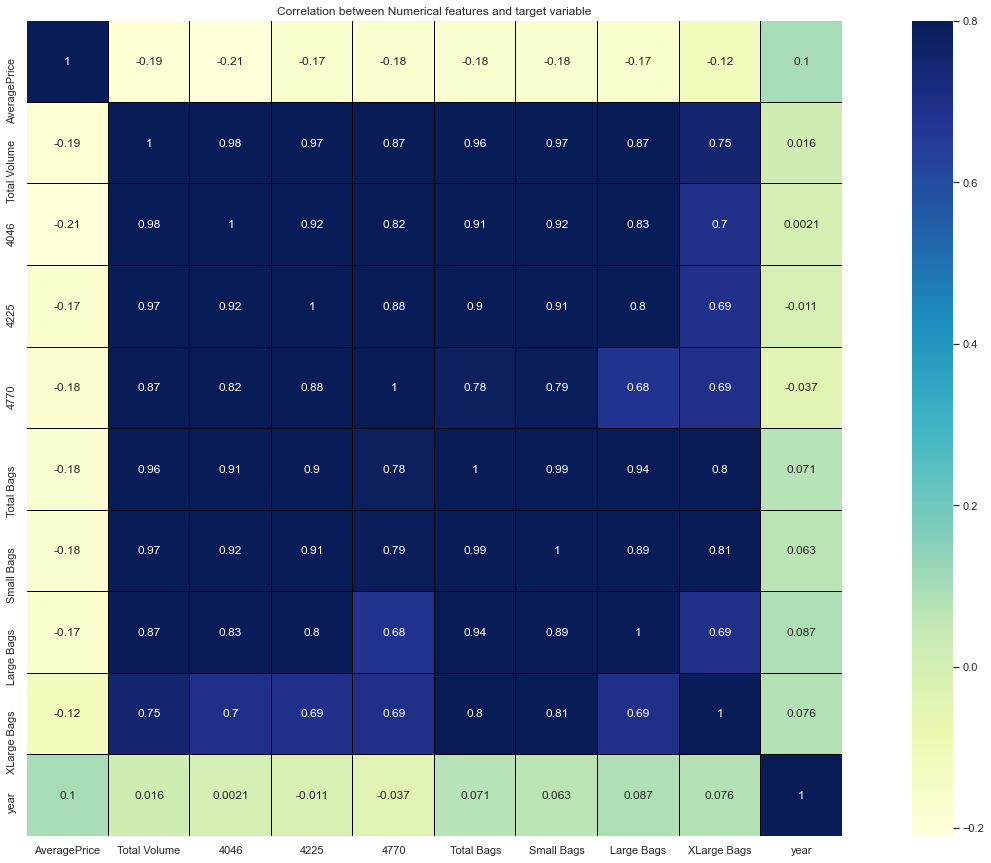

In [40]:
#Check correlation primarily between Numerical linear features and target variable
#Correlation is a measure used to represent how strongly two random variables are related to each other.
#Correlation ranges between -1 and +1
corr = avocado_master_data.corr(method='pearson')
plt.figure(figsize=(25,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between Numerical features and target variable')

**Observations:**

- There is strong positive correlation for **Total Volume** with **4046**, **4225**, **4770**,**Total Bags**, **Small Bags** and **Large Bags** 
- There is higher positive correlation for **Total Bags** with **Small Bags**, **Large Bags** and **XLarge Bags**
- There is strong positive correlation for **4225** with **4046** and **Total Bags**

In [41]:
#Covariance is a measure to indicate the extent to which two random variables change in tandem.
#Covariance can vary between -∞ and +∞
avocado_master_data.cov()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,0.163635,-2.587669e+05,-1.026199e+05,-8.076573e+04,-7.422057e+03,-6.795968e+04,-5.061439e+04,-1.651534e+04,-8.299504e+02,0.037812
Total Volume,-258766.863303,1.083735e+13,3.876583e+12,3.684149e+12,2.920570e+11,2.984562e+12,2.269172e+12,6.727599e+11,4.262944e+10,49520.898534
4046,-102619.884014,3.876583e+12,1.456347e+12,1.278013e+12,1.020488e+11,1.040174e+12,7.919038e+11,2.337430e+11,1.452765e+10,2386.905704
4225,-80765.728485,3.684149e+12,1.278013e+12,1.322994e+12,1.037260e+11,9.794166e+11,7.501135e+11,2.155493e+11,1.375389e+10,-12072.266718
4770,-7422.056629,2.920570e+11,1.020488e+11,1.037260e+11,1.051871e+10,7.576365e+10,5.813348e+10,1.639865e+10,1.231516e+09,-3571.827681
Total Bags,-67959.677884,2.984562e+12,1.040174e+12,9.794166e+11,7.576365e+10,8.892065e+11,6.690212e+11,2.070689e+11,1.311639e+10,62775.898084
Small Bags,-50614.387782,2.269172e+12,7.919038e+11,7.501135e+11,5.813348e+10,6.690212e+11,5.096835e+11,1.493364e+11,1.000125e+10,42323.125124
Large Bags,-16515.339625,6.727599e+11,2.337430e+11,2.155493e+11,1.639865e+10,2.070689e+11,1.493364e+11,5.491716e+10,2.815386e+09,19224.707539
XLarge Bags,-829.950357,4.262944e+10,1.452765e+10,1.375389e+10,1.231516e+09,1.311639e+10,1.000125e+10,2.815386e+09,2.997554e+08,1228.065480
year,0.037812,4.952090e+04,2.386906e+03,-1.207227e+04,-3.571828e+03,6.277590e+04,4.232313e+04,1.922471e+04,1.228065e+03,0.879029


<a name = Section7></a>

---
# **7. Data Post-Processing**
---



<a name = Section71></a>
### **7.1 Feature Encoding**

- In this section, we will encode and select feature needed further for preparation

In [42]:
X_encoded = pd.get_dummies(avocado_master_data, columns=['region', 'type','year'], drop_first=True)

In [43]:
test_encoded = pd.get_dummies(avocado_test_data, columns=['region', 'type','year'], drop_first=True)

In [44]:
# getting y
y= avocado_master_data.AveragePrice

In [45]:
finalX= X_encoded.drop(columns=['Date','AveragePrice'])

In [46]:
test_final = test_encoded.drop(columns=['Date'])

In [47]:
finalX.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_organic,year_2016,year_2017,year_2018
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14761,2584.08,61.21,143.82,0.00,2379.05,2379.05,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
6843,100811.00,3181.00,43510.00,86.00,54034.00,11788.00,42246.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7306,430096.94,242212.80,81697.52,264.25,105922.37,48557.37,57365.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12329,5433.16,437.48,2422.71,544.63,2028.34,2021.67,6.67,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
12036,5614.09,2123.47,2121.26,0.00,1369.36,392.02,977.34,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [48]:
test_final.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_organic,year_2016,year_2017,year_2018
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11137,12425.42,426.78,6174.20,548.21,5276.23,2313.33,2962.90,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
16503,11837.20,2749.91,124.43,0.00,8962.86,8921.88,40.98,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
6438,4250394.01,740503.01,1423924.97,356791.68,1729174.35,1157601.31,485376.01,86197.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8247,74951.66,1032.62,43170.45,42.00,30706.59,28525.65,2180.94,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
10481,4594.71,592.64,2602.48,0.00,1399.59,696.67,702.92,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [49]:
# # Saving all feature names to a list in a variable
# dataColumns = finalX.columns.to_list()

# encoder = StandardScaler()

# for i in dataColumns:
#    finalX[i] = encoder.fit_transform(finalX[[i]])

# print('Success!')

In [50]:
# test_dataColumns = test_final.columns.to_list()

# #encoder = StandardScaler()

# for i in test_dataColumns:
#    test_final[i] = encoder.transform(test_final[[i]])

# print('Success!')

In [51]:
# from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
# from yellowbrick.model_selection import FeatureImportances 
# from sklearn.ensemble import RandomForestRegressor 

# # Have some patience, may take some time :)
# selector = SelectFromModel(RandomForestRegressor(n_estimators = 200, random_state = 42, n_jobs = -1))
# selector.fit(finalX, y)

# # Extracting list of important features
# selected_feat = finalX.columns[(selector.get_support())].tolist()

# print('Total Features Selected are', len(selected_feat))

# # Estimated by taking mean(default) of feature importance
# print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
# print('Features:', selected_feat)

In [52]:
# figure = plt.figure(figsize = [20, 12])

# # If you don't want relative importance, use relative = False in below method
# viz = FeatureImportances(selector.estimator, relative = False)
# viz.fit(finalX, y)

# plt.xlabel('Relative Importance', size = 14)
# plt.ylabel('Features', size = 14)
# plt.title(label = 'Feature Importances', size = 16)
# plt.show()

<a name = Section72></a>
### **7.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development using holdout validation technique.

In [53]:
# Splitting data into training and testing sets with using Validation Test Data as 25%
X_train, X_test, y_train, y_test = train_test_split(finalX, y, test_size=0.25, random_state=42)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
X_train.info()
#X_train.columns
X_train.head()

X_train shape:  (10949, 65)
y_train shape:  (10949,)
X_test shape:  (3650, 65)
y_test shape:  (3650,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10949 entries, 13303 to 13147
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total Volume                10949 non-null  float64
 1   4046                        10949 non-null  float64
 2   4225                        10949 non-null  float64
 3   4770                        10949 non-null  float64
 4   Total Bags                  10949 non-null  float64
 5   Small Bags                  10949 non-null  float64
 6   Large Bags                  10949 non-null  float64
 7   XLarge Bags                 10949 non-null  float64
 8   region_Atlanta              10949 non-null  uint8  
 9   region_BaltimoreWashington  10949 non-null  uint8  
 10  region_Boise                10949 non-null  uint8  
 11  region_Boston               10949 non-n

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_organic,year_2016,year_2017,year_2018
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13303,9481.10,474.37,4139.64,0.00,4867.09,2013.33,2853.76,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
14424,3042.30,59.36,1319.25,0.00,1663.69,234.02,1429.67,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
8877,1619549.79,941189.25,269078.43,14057.17,395224.94,227505.97,161870.08,5848.89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
17659,26704.98,60.87,2647.48,0.00,23996.63,21985.03,2011.60,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
11936,1886.63,42.26,156.72,0.00,1687.65,1687.65,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [54]:
# from sklearn.neighbors import LocalOutlierFactor
# lof = LocalOutlierFactor()
# yhat = lof.fit_predict(X_train)

In [55]:
#yhat

<a name = Section73></a>
### **7.3 Data Scaling**

- Here we can try various scaling options available to arrive at best option
- Here I have decided to use RobustScaler scaling as of now after trying with different scaling options to cover outlier.

In [56]:
#Scaling the X part of data
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
# #scalar=StandardScaler() # defining object
scalar = RobustScaler()
scalar.fit(X_train) #defining the scal
X_train_s=scalar.transform(X_train)#actual scaling
X_test_s=scalar.transform(X_test)

test_final_s = scalar.transform(test_final)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop a Linear Regression, Decision Tree and RandomForest model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **RMSE Score** score as required by this project.

<a name = Section81></a>
### **8.1 Baseline Model Development & Evaluation**

- Here we will develop Linear Regression model using default setting.

In [57]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
#linreg.fit(X_train, y_train) 
#y_pred_train_lg=linreg.predict(X_train)
#y_pred_test_lg=linreg.predict(X_test)

linreg.fit(X_train_s, y_train) 
y_pred_train_lg=linreg.predict(X_train_s)
y_pred_test_lg=linreg.predict(X_test_s)

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE_train = mean_absolute_error(y_train, y_pred_train_lg)
MAE_test = mean_absolute_error(y_test, y_pred_test_lg)

In [59]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.19369377116584965
MAE for test set is 0.19042246424737874


In [60]:
MSE_train = mean_squared_error(y_train, y_pred_train_lg)
MSE_test = mean_squared_error(y_test, y_pred_test_lg)

In [61]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.0680910001073761
MSE for test set is 0.06597151836997227


In [62]:
RMSE_train = np.sqrt( mean_squared_error(y_train, y_pred_train_lg))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test_lg))

In [63]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.260942522612502
RMSE for test set is 0.2568492132944391


In [64]:
from sklearn.metrics import r2_score
r2_score_train = r2_score(y_train, y_pred_train_lg)
r2_score_test = r2_score(y_test, y_pred_test_lg)

In [65]:
r2_score_train

0.5838770205186739

In [66]:
r2_score_test

0.5962552967092895

- Here we will do prediction on Test Dataset (aka Real World Data) using Linear Regression model.

In [67]:
import sys
np.set_printoptions(threshold=sys.maxsize)
y_test_pred_lg = linreg.predict(test_final_s)
y_test_pred_lg
#print (y_test_pred.shape)
#print (y_test_pred)

array([1.49959409, 1.56592171, 1.27175223, 1.38884484, 1.44153695,
       1.05531575, 1.56665506, 1.7011939 , 1.29418458, 1.10104537,
       1.56546423, 1.8444885 , 1.92970893, 1.84025899, 1.71702948,
       1.18788498, 1.58421026, 0.94584009, 1.80832425, 1.70302516,
       1.96453603, 1.21866878, 1.68005471, 1.53688011, 1.61298316,
       1.71473859, 1.28865077, 0.92838372, 0.93167659, 0.8828617 ,
       1.5442687 , 1.62131214, 1.76719472, 1.5007053 , 1.22642663,
       1.27472908, 1.55793138, 1.10752058, 1.55829975, 1.88305746,
       1.35370786, 1.64561656, 0.79966518, 1.9217523 , 1.26010503,
       1.99039089, 1.28635598, 1.54954615, 0.91491656, 0.8865683 ,
       1.44214974, 1.08211601, 1.63665903, 1.67818088, 1.20492868,
       2.03036701, 1.30569827, 1.20162643, 1.75087626, 1.61732585,
       1.11402974, 1.42213415, 1.10198908, 1.32310306, 1.20822213,
       1.81142291, 0.84827467, 1.55850212, 1.8963986 , 1.45831524,
       1.06761923, 0.76436228, 1.73170999, 1.38754413, 1.21988

- Here we will write output of prediction to CSV file for submission.

In [68]:
output = pd.DataFrame({'Id': test_final.index,'AveragePrice': y_test_pred_lg})
output.to_csv('avocado-price-prediction-submission1.csv', index=False, header=False)

- Here we will develop DecisionTree Regression model using default setting.

In [69]:
# Importing and developing simple Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='mse')
model.fit(X_train_s, y_train)

DecisionTreeRegressor()

In [70]:
y_pred_train_dt=model.predict(X_train_s)
y_pred_test_dt=model.predict(X_test_s)

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE_train_dt = mean_absolute_error(y_train, y_pred_train_dt)
MAE_test_dt = mean_absolute_error(y_test, y_pred_test_dt)

In [72]:
print('MAE for training set is {}'.format(MAE_train_dt))
print('MAE for test set is {}'.format(MAE_test_dt))

MAE for training set is 6.388167919571181e-19
MAE for test set is 0.1504931506849315


In [73]:
MSE_train_dt = mean_squared_error(y_train, y_pred_train_dt)
MSE_test_dt = mean_squared_error(y_test, y_pred_test_dt)

In [74]:
print('MSE for training set is {}'.format(MSE_train_dt))
print('MSE for test set is {}'.format(MSE_test_dt))

MSE for training set is 1.1820485182466185e-34
MSE for test set is 0.05197199999999999


In [75]:
RMSE_train_dt = np.sqrt( mean_squared_error(y_train, y_pred_train_dt))
RMSE_test_dt = np.sqrt(mean_squared_error(y_test, y_pred_test_dt))

In [76]:
print('RMSE for training set is {}'.format(RMSE_train_dt))
print('RMSE for test set is {}'.format(RMSE_test_dt))

RMSE for training set is 1.0872205471966662e-17
RMSE for test set is 0.22797368269166507


In [77]:
from sklearn.metrics import r2_score
r2_score_train_dt = r2_score(y_train, y_pred_train_dt)
r2_score_test_dt = r2_score(y_test, y_pred_test_dt)

In [78]:
r2_score_train_dt

1.0

In [79]:
r2_score_test_dt

0.6819321392339568

- Here we will do prediction on Test Dataset (aka Real World Data) using Decision Tree Regression model.

In [80]:
import sys
np.set_printoptions(threshold=sys.maxsize)
y_test_pred_dt = linreg.predict(test_final_s)
y_test_pred_dt

array([1.49959409, 1.56592171, 1.27175223, 1.38884484, 1.44153695,
       1.05531575, 1.56665506, 1.7011939 , 1.29418458, 1.10104537,
       1.56546423, 1.8444885 , 1.92970893, 1.84025899, 1.71702948,
       1.18788498, 1.58421026, 0.94584009, 1.80832425, 1.70302516,
       1.96453603, 1.21866878, 1.68005471, 1.53688011, 1.61298316,
       1.71473859, 1.28865077, 0.92838372, 0.93167659, 0.8828617 ,
       1.5442687 , 1.62131214, 1.76719472, 1.5007053 , 1.22642663,
       1.27472908, 1.55793138, 1.10752058, 1.55829975, 1.88305746,
       1.35370786, 1.64561656, 0.79966518, 1.9217523 , 1.26010503,
       1.99039089, 1.28635598, 1.54954615, 0.91491656, 0.8865683 ,
       1.44214974, 1.08211601, 1.63665903, 1.67818088, 1.20492868,
       2.03036701, 1.30569827, 1.20162643, 1.75087626, 1.61732585,
       1.11402974, 1.42213415, 1.10198908, 1.32310306, 1.20822213,
       1.81142291, 0.84827467, 1.55850212, 1.8963986 , 1.45831524,
       1.06761923, 0.76436228, 1.73170999, 1.38754413, 1.21988

In [81]:
output = pd.DataFrame({'Id': test_final.index,'AveragePrice': y_test_pred_dt})
output.to_csv('avocado-price-prediction-submission2.csv', index=False, header=False)

- Here we will develop RandomForest Regression model using default setting.

In [82]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state = 0)
model_rf.fit(X_train_s, y_train)

RandomForestRegressor(random_state=0)

In [83]:
y_pred_train_rf = model_rf.predict(X_train_s)
y_pred_test_rf = model_rf.predict(X_test_s)

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
MAE_test_rf = mean_absolute_error(y_test, y_pred_test_rf)

In [85]:
print('MAE for training set is {}'.format(MAE_train_rf))
print('MAE for test set is {}'.format(MAE_test_rf))

MAE for training set is 0.041891140743446874
MAE for test set is 0.11066345205479451


In [86]:
MSE_train_rf = mean_squared_error(y_train, y_pred_train_rf)
MSE_test_rf = mean_squared_error(y_test, y_pred_test_rf)

In [87]:
print('MSE for training set is {}'.format(MSE_train_rf))
print('MSE for test set is {}'.format(MSE_test_rf))

MSE for training set is 0.0036089374052424863
MSE for test set is 0.024712254383561637


In [88]:
RMSE_train_rf = np.sqrt( mean_squared_error(y_train, y_pred_train_rf))
RMSE_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))

In [89]:
print('RMSE for training set is {}'.format(RMSE_train_rf))
print('RMSE for test set is {}'.format(RMSE_test_rf))

RMSE for training set is 0.060074432209072826
RMSE for test set is 0.1572013180083476


In [90]:
from sklearn.metrics import r2_score
r2_score_train_rf = r2_score(y_train, y_pred_train_rf)
r2_score_test_rf = r2_score(y_test, y_pred_test_rf)

In [91]:
r2_score_train_rf

0.9779447829601136

In [92]:
r2_score_test_rf

0.8487613736918778

- Here we will do prediction on Test Dataset (aka Real World Data) using RandomForest Regression model.

In [93]:
import sys
np.set_printoptions(threshold=sys.maxsize)
y_test_pred_rf = linreg.predict(test_final_s)
y_test_pred_rf

array([1.49959409, 1.56592171, 1.27175223, 1.38884484, 1.44153695,
       1.05531575, 1.56665506, 1.7011939 , 1.29418458, 1.10104537,
       1.56546423, 1.8444885 , 1.92970893, 1.84025899, 1.71702948,
       1.18788498, 1.58421026, 0.94584009, 1.80832425, 1.70302516,
       1.96453603, 1.21866878, 1.68005471, 1.53688011, 1.61298316,
       1.71473859, 1.28865077, 0.92838372, 0.93167659, 0.8828617 ,
       1.5442687 , 1.62131214, 1.76719472, 1.5007053 , 1.22642663,
       1.27472908, 1.55793138, 1.10752058, 1.55829975, 1.88305746,
       1.35370786, 1.64561656, 0.79966518, 1.9217523 , 1.26010503,
       1.99039089, 1.28635598, 1.54954615, 0.91491656, 0.8865683 ,
       1.44214974, 1.08211601, 1.63665903, 1.67818088, 1.20492868,
       2.03036701, 1.30569827, 1.20162643, 1.75087626, 1.61732585,
       1.11402974, 1.42213415, 1.10198908, 1.32310306, 1.20822213,
       1.81142291, 0.84827467, 1.55850212, 1.8963986 , 1.45831524,
       1.06761923, 0.76436228, 1.73170999, 1.38754413, 1.21988

In [94]:
output = pd.DataFrame({'Id': test_final.index,'AveragePrice': y_test_pred_rf})
output.to_csv('avocado-price-prediction-submission3.csv', index=False, header=False)

<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- Model with Best RMSE Score was used for prediction considering this is ML Intermediate project.
- RMSE Score was used to arrive at model evaluation which is required for this ML Intermediate Project.
- Correlation Heatmap shows linear relationship between Numeric features and Target Variable.
- Below we have comparison with Linear Regression, Decision Tree and Random Forest model.

The RMSE and R2 Score for each model for Test Validation data

|Sl. No.|| Model Name || RMSE Score || R-square Value |
|----||---------||------------||-------------|
|1|| Linear Regression Model|| 0.256||0.596|
|2|| Decision Tree Model|| 0.228||0.680|
|3|| Random Forest Model|| 0.157||0.848|